                            OLS Regression Results                            
Dep. Variable:          Sales Revenue   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     923.6
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.84e-19
Time:                        19:58:01   Log-Likelihood:                -133.03
No. Observations:                  24   AIC:                             270.1
Df Residuals:                      22   BIC:                             272.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.0761     27.19

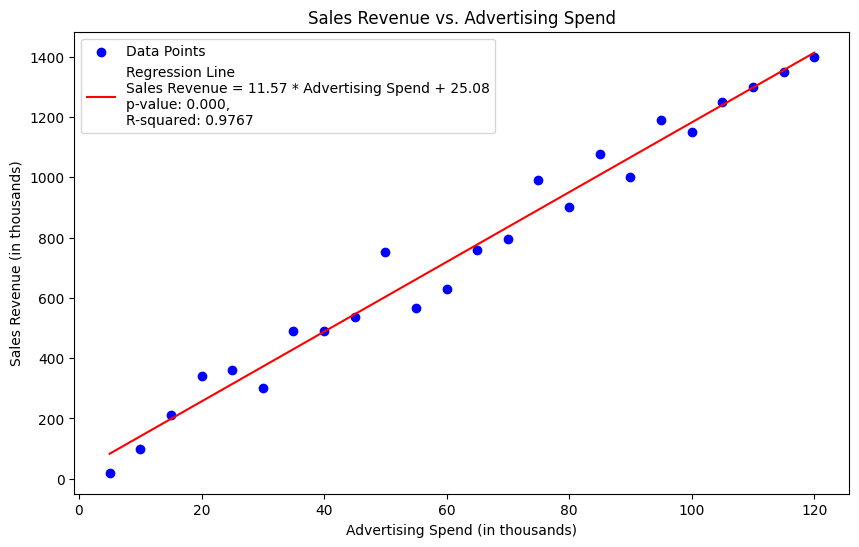

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Setting a random seed for reproducibility
np.random.seed(42)

# Expanded Dataset
data = {
    'Advertising Spend': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                          55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
                          105, 110, 115, 120],  # Added four more data points
    'Sales Revenue': np.array([20, 100, 210, 340, 360, 300, 490, 490, 537, 752,
                               565, 630, 759, 794, 990, 900, 1077, 1001, 1190, 1150,
                               1250, 1300, 1350, 1400])  # Added estimated sales revenue for new data points
}

df = pd.DataFrame(data)

# Defining the dependent and independent variables
X = df['Advertising Spend']  # Independent variable
y = df['Sales Revenue']      # Dependent variable

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Extracting p-value and R-squared
p_value = model.pvalues[1]
r_squared = model.rsquared

# Extracting coefficients
intercept = model.params[0]
slope = model.params[1]

# Print out the statistics
print(model.summary())

# Constructing the linear regression equation
linear_eqn = f'Regression Line\nSales Revenue = {slope:.2f} * Advertising Spend + {intercept:.2f}'

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Advertising Spend'], df['Sales Revenue'], color='blue', label='Data Points')
plt.plot(df['Advertising Spend'], model.predict(X), color='red', label=f'{linear_eqn}\np-value: {p_value:.3f}, \nR-squared: {r_squared:.4f}')
plt.title('Sales Revenue vs. Advertising Spend')
plt.xlabel('Advertising Spend (in thousands)')
plt.ylabel('Sales Revenue (in thousands)')
plt.legend()
plt.show()
